# Computer Vision Workshop

## Introduction
Welcome to this hands-on computer vision workshop! In this session, we'll explore fundamental techniques including:
- Camera activation and video capture
- Image filtering and transformations
- Basic line and edge detection

## 1. Setting Up Your Environment
First, let's make sure you have the required libraries installed:

```python
!pip install opencv-python numpy matplotlib




In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


## Uploading and Processing Images

Now that we've worked with the libraries, let's learn how to work with existing images. This is fundamental for many computer vision applications where you need to analyze stored images.

### Basic Image Upload and Display

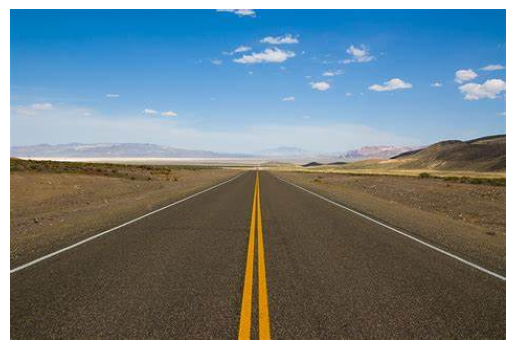

In [3]:
image_path = r'day1_images\1.jpeg'  #Make sure to put an r if you have error
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()



## Detecting Edges with the Canny Filter
Now that we can load and display images, let’s explore one of the most fundamental techniques in computer vision: edge detection. The Canny filter helps us identify the boundaries and shapes within an image—a crucial step for object detection, lane finding, and more.

### Why Edges Matter
Edges define the structure of objects in an image. By detecting them, we can:

 * Simplify image analysis by focusing on key features

 * Prepare data for advanced tasks (e.g., contour detection, object recognition)

 * Reduce noise while preserving important visual patterns

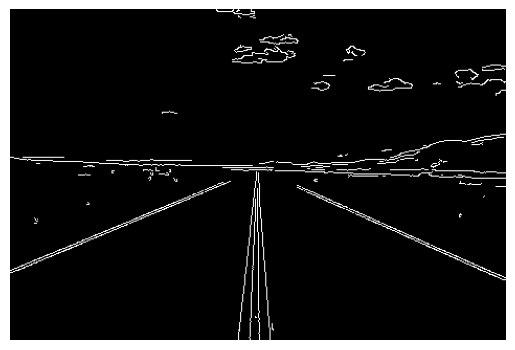

In [ ]:
image_path = r'day1_images\1.jpeg'  
image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image_gray, 180, 300)  # Apply the canny filter  with threshold lower  180 to 300 on upper 

plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

## Detecting Lines with HoughLinesP
Now that we've extracted edges using the Canny filter, let's take the next step: identifying straight lines in our image. The Probabilistic Hough Line Transform (HoughLinesP) converts edge points into meaningful line segments—perfect for detecting lanes, building edges, or any linear structure.

### From Edges to Lines: Why It Matters
While edge detection shows us where boundaries exist, HoughLinesP helps us:

* Understand geometric relationships between edges

* Measure object dimensions (e.g., road markings, architectural features)

* Filter noise by focusing only on coherent lines

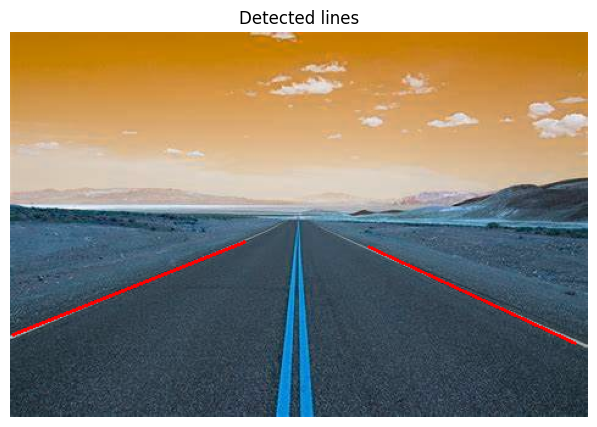

In [ ]:

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 180, 300) #It is binary 
"""t_lower : If a pixel’s gradient is below this value, it’s rejected outright. 

  t_upper : Pixels with gradients above this value are definitely considered edges.  """


#Detect the lines by using HoughLines 
lines = cv2.HoughLinesP(edges, 1, # 1 the resolution of 1 pxl,
                        np.pi / 50,# angle resolution of pi/180, 
                          threshold=100, # minimum acumulator of 100, 
                          minLineLength=50,# min lenght to be accepted as a line 
                            maxLineGap=30)#maximum gap between line to treat them as a single line

#Draw the lines detected
output = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 2) #Print the lines 

# Show the result 
plt.figure(figsize=(10, 5))
plt.imshow(output,cmap='gray')
plt.axis('off')
plt.title('Detected lines')
plt.show()


## Say Cheese! Activating Live Camera Capture
Let's bring our vision system to life! In this section, we'll transition from static images to real-time video processing—the foundation for interactive applications like facial recognition or augmented reality.

### Why Live Camera Matters
Unlike single images, video streams allow us to:

* Build responsive systems (e.g., gesture controls)

* Process temporal patterns (motion detection)

* Create immersive AR/VR experiences

In [ ]:
cap = cv2.VideoCapture(0) # Capture the photograms, 0 is the number of the camera 

while True :
    ret, frame = cap.read() # Read the frame and size 
    if not ret: # If there is nothing the code finish 
        break
    
    # cv2.imshow create a window
    cv2.imshow("Cheese", frame)  # Name of the window is "cheese", and will be adding frame to that window 

    if cv2.waitKey(1) & 0xFF == ord('q'): #If you want to finish press q (you can change the keyboard you want)
        break

    #The whole loop get updated per photogram 

cap.release() # Finish to capturing 
cv2.destroyAllWindows() # Close the window 


## Real-Time Edge & Line Detection
Let's combine what we've learned! We'll now apply Canny edge detection and Hough line transforms to a live camera feed - the foundation for applications like:

* Autonomous vehicle lane detection

* Industrial quality control systems

* Interactive art installations

### How It Works (Live Version)
While the core algorithms remain the same, real-time processing adds new considerations:

Frame Processing Pipeline:

Camera captures frame → Convert to grayscale → Apply Canny → Detect lines with Hough


In [ ]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing the image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Change the color to gray 

    
    edges = cv2.Canny(gray, 50, 150)  # Apply the canny filter  with threshold lower  50 to 150 on upper 
    """t_lower : If a pixel’s gradient is below this value, it’s rejected outright. 

        t_upper : Pixels with gradients above this value are definitely considered edges.  """

    #Detect the lines by using HoughLines 
    lines = cv2.HoughLinesP(edges, 1, # 1 the resolution of 1 pxl,
                            np.pi / 50,# angle resolution of pi/180, 
                            threshold=100, # minimum acumulator of 100, 
                            minLineLength=50,# min lenght to be accepted as a line 
                                maxLineGap=30)#maximum gap between line to treat them as a single line

    #Draw the lines detected
    output = frame.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output, (x1, y1), (x2, y2), (255, 0, 0), 2) #Print the lines 

    # Mostrar resultado
    cv2.imshow("Canny", output)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break



: 

## 🚀 Challenge: Build Your Own Circle Detector!

It's time to put your skills to the test! Below is a framework to create a customized circle detection system. 

<details>
<summary><b>🎯 Basic Challenge</b> (Click to expand)</summary>

### Minimum Requirements:
1. Live camera circle detection
2. Adjustable radius range (min/max)
3. Visual feedback:
   - Green outline for detected circles
   - Red dot at circle centers
4. Exit with 'q' key

```python
# Your starter template

gray = cv2.medianBlur(gray, 5)

circles = cv2.HoughCircles(
    gray, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=20,
    param1=50, 
    param2=30, 
    minRadius=10, 
    maxRadius=100
)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

cap = cv2.VideoCapture(0)


In [ ]:
# Star here :  



<details><summary>Click here to view the solution.</summary>
```
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Processing the image 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Change the color to gray 
    gray = cv2.medianBlur(gray, 5)

    circles = cv2.HoughCircles(
    gray, 
    cv2.HOUGH_GRADIENT, 
    dp=1.2, 
    minDist=80,
    param1=50, 
    param2=50, 
    minRadius=50, 
    maxRadius=150
    )

    output = gray.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(output, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(output, (i[0], i[1]), 2, (0, 0, 255), 3)

    # Mostrar resultado
    cv2.imshow("Canny", output)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

```
</details>